数据下载：
https://data.mendeley.com/datasets/g67bkbnhhg/1

环境安装：https://github.com/BayraktarLab/cell2location#Installation
<br>
```python
conda create -y -n cell2loc_env python=3.9
conda activate cell2loc_env
pip install cell2location[tutorials]
```
将该环境注入jupyter notebook
```python
conda activate cell2loc_env
conda install ipykernel --yes
python -m ipykernel install --user --name=cell2loc_env --display-name='Environment (cell2loc_env)'
```
OR 【注意】在base环境下
```python
conda install nb_conda
```

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
from cell2location.utils import select_slide

我们首先需要熟悉空转在scanpy中的数据结构

In [21]:
adata_vis = sc.read_h5ad("data/visium_merge_inter_upload.h5ad")

In [22]:
adata_vis

AnnData object with n_obs × n_vars = 27912 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'donor_id', 'region'
    var: 'feature_types', 'genome', 'SYMBOL', 'mt', 'n_cells_by_counts-6800STDY12499406', 'mean_counts-6800STDY12499406', 'log1p_mean_counts-6800STDY12499406', 'pct_dropout_by_counts-6800STDY12499406', 'total_counts-6800STDY12499406', 'log1p_total_counts-6800STDY12499406', 'n_cells_by_counts-6800STDY12499407', 'mean_counts-6800STDY12499407', 'log1p_mean_counts-6800STDY12499407', 'pct_dropout_by_counts-6800STDY12499407', 'total_counts-6800STDY12499407', 'log1p_total_counts-6800STDY12499407', 'n_cells_by_counts-6800STDY12499408', 'mean_counts-6800STDY12499408', 'log1p_mean_counts-6800STDY12499408', 'pct_dropout_by_counts-6800STDY12499408', 'tot

`important` 注意adata_vis的数据结构：
1. 切片图像保存于`adata_vis.uns['spatial']`
2. 在cell2location中，切片转录组默认使用`adata_vis.obs['sample']`用于区分不同切片的数据

修改`adata_vis.uns['spatial']`的key值使之和`adata_vis.obs['sample']`保持一致，这样才能使用`select_slide`函数根据切片subset数据

In [23]:
for k in list(adata_vis.uns['spatial'].keys()):
    adata_vis.uns['spatial'][k.split('_')[3]] = adata_vis.uns['spatial'].pop(k) 

In [24]:
list(adata_vis.uns['spatial'].keys())

['6800STDY12499406',
 '6800STDY12499407',
 '6800STDY12499410',
 '6800STDY12499411',
 '6800STDY12499408',
 '6800STDY12499409',
 '6800STDY12499412',
 '6800STDY12499413',
 '6800STDY12499502',
 '6800STDY12499503',
 '6800STDY12499504',
 '6800STDY12499505',
 '6800STDY12499506',
 '6800STDY12499507',
 '6800STDY12499508',
 '6800STDY12499509']

In [25]:
adata_vis.obs[['sample', 'donor_id']].value_counts()

sample            donor_id
6800STDY12499406  PD43824     3352
6800STDY12499508  PD47465     2831
6800STDY12499509  PD47465     2811
6800STDY12499502  PD45814     2700
6800STDY12499504  PD45815     2670
6800STDY12499503  PD45814     2661
6800STDY12499505  PD45815     2580
6800STDY12499507  PD45816     2145
6800STDY12499409  PD47512     2085
6800STDY12499411  PD47171     2048
6800STDY12499506  PD45816     2029
dtype: int64

In [27]:
?select_slide

Signature: select_slide(adata, s, batch_key='sample')
Docstring:
This function selects the data for one slide from the spatial anndata object.

:param adata: Anndata object with multiple spatial experiments
:param s: name of selected experiment
:param batch_key: column in adata.obs listing experiment name for each location
File:      /home/conda/envs/scrna/lib/python3.9/site-packages/cell2location/utils/__init__.py
Type:      function


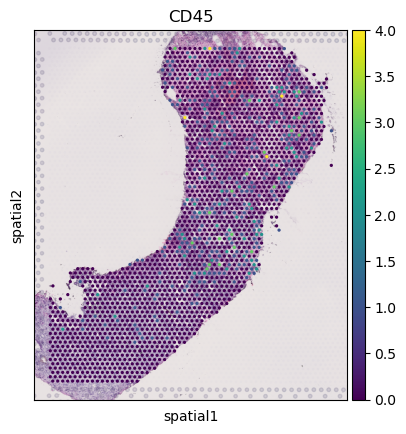

In [26]:
## 选择切片画图
slide = select_slide(adata_vis, '6800STDY12499506')
sc.pl.spatial(slide, color='PTPRC', gene_symbols='SYMBOL', title='CD45')